## 一些基本概念的回顾：
<p> Receiver operating characteristic curve (ROC 曲线)：
<p> TP: true positives
<p> FP: false positives
<p> TN: true negatives
<p> FN: false negatives
$$precision = \frac{TP}{TP+FP}$$

$$recall = \frac{TP}{TP+FN}$$

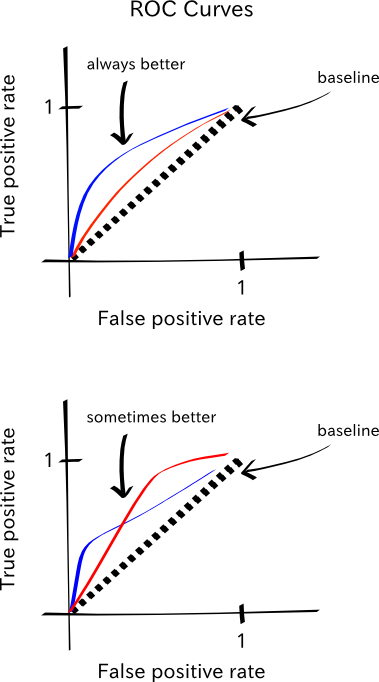

## 分类包括两种方式：
### 方式一;
回归分类:其主要思想为将其看成一个回归问题，然后设置阈值将其分类

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x_label0 = np.random.normal(5, 1, 10) 
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1) 
labels = [0.] * len(x_label0) + [1.] * len(x_label1) 

In [29]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [30]:
def Mode(w,x):
    return tf.add(tf.multiply(w[1],tf.pow(x,1)),
                     tf.multiply(w[0],tf.pow(x,0))) ##w*x + b 这个是一个值得借鉴的写法

In [31]:
learning_rate = 0.001
training_epochs = 1000
w = tf.Variable([0.,0.])
y_model = Mode(w,x)
cost = tf.reduce_sum(tf.square(y_model - y))
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [32]:
init = tf.global_variables_initializer()

In [35]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for epoach in range(training_epochs):
        result  = sess.run(train,feed_dict = {x: xs,y: labels})
        #When the model’s response is greater than 0.5, it should be a positive label, and vice versa
        prediction = tf.equal(y,tf.to_float(tf.greater(y_model,0.5))) 
        accuracy = tf.reduce_mean(tf.to_float(prediction))   
        A = sess.run(accuracy,feed_dict = {x:xs, y: labels})                  
        if epoach % 200 == 0:
            print('accuracy = ', A)
    w_val = sess.run(w)
    print('Learning parmeters', w_val)

accuracy =  0.5
accuracy =  0.8
accuracy =  0.85
accuracy =  0.85
accuracy =  0.9
Learning parmeters [ 1.2309839  -0.21004334]


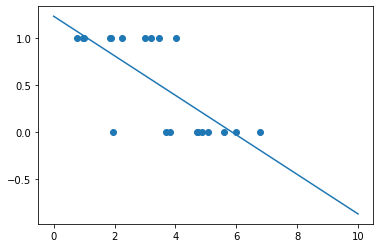

In [36]:
plt.scatter(xs,labels)
all_xs = np.linspace(0, 10, 100) 
plt.plot(all_xs, all_xs*w_val[1] + w_val[0]) 
plt.show() 

## 注：当数据集稀疏的时候，集变得离散性更强时候，线性回归分类效果就会变得很差